In [ ]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
data_file = open("/content/drive/MyDrive/sensor_frames_flat_18112025-1848.jsonl", "rb")
raw_data = data_file.read().decode()
data_file.close()

In [ ]:
sensor_data_df = pd.read_json(StringIO(raw_data), lines=True)
#sensor_data_df.dropna(inplace=True)
sensor_data_df.head()

,frame_ts,frame_idx,front_imu_log_ts,front_imu_ts,front_imu_sonar_echo_us,front_imu_sonar_mm,front_imu_sonar_cm,front_imu_imu_ax,front_imu_imu_ay,front_imu_imu_az,...,primary_imu_mpuA_g_z,primary_imu_mpuA_t,primary_imu_mpuB_a_x,primary_imu_mpuB_a_y,primary_imu_mpuB_a_z,primary_imu_mpuB_g_x,primary_imu_mpuB_g_y,primary_imu_mpuB_g_z,primary_imu_mpuB_t,front_imu_sonar_timeout
0,1.763483e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.763483e+09,2,1.763483e+09,1084468.0,347.0,59.5,5.95,0.790,-0.680,-13.230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.763483e+09,3,1.763483e+09,1084482.0,347.0,59.5,5.95,0.381,-2.705,-13.312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.763483e+09,4,1.763483e+09,1084509.0,347.0,59.5,5.95,0.251,-2.835,-12.783,...,0.61,27.19,0.218,-0.905,-0.125,-0.27,-0.64,1.01,26.81,NaN
4,1.763483e+09,5,1.763483e+09,1084523.0,348.0,59.7,5.97,0.833,-0.383,-12.704,...,0.03,27.17,0.174,-1.037,-0.147,-0.90,-0.03,1.40,26.82,NaN


In [ ]:
sensor_data_df.drop(columns=["frame_idx", "front_imu_log_ts", "front_imu_ts"], inplace=True)
sensor_data_df.columns

Index(['frame_ts', 'front_imu_sonar_echo_us', 'front_imu_sonar_mm',
       'front_imu_sonar_cm', 'front_imu_imu_ax', 'front_imu_imu_ay',
       'front_imu_imu_az', 'front_imu_imu_gx', 'front_imu_imu_gy',
       'front_imu_imu_gz', 'front_imu_imu_t', 'rear_brake_gps_log_ts',
       'rear_brake_gps_S1', 'rear_brake_gps_rear_ss_mm',
       'rear_brake_gps_gps_sats', 'rear_brake_gps_gps_fix',
       'front_tyre_log_ts', 'front_tyre_S1', 'front_tyre_S2',
       'brakes_imu_log_ts', 'brakes_imu_ts', 'brakes_imu_in_d5',
       'brakes_imu_in_d6', 'brakes_imu_imu_ax', 'brakes_imu_imu_ay',
       'brakes_imu_imu_az', 'brakes_imu_imu_gx', 'brakes_imu_imu_gy',
       'brakes_imu_imu_gz', 'brakes_imu_imu_t', 'front_brakes_tps_log_ts',
       'front_brakes_tps_tps', 'front_brakes_tps_S1', 'primary_imu_log_ts',
       'primary_imu_ts', 'primary_imu_mpuA_a_x', 'primary_imu_mpuA_a_y',
       'primary_imu_mpuA_a_z', 'primary_imu_mpuA_g_x', 'primary_imu_mpuA_g_y',
       'primary_imu_mpuA_g_z', 'primary

In [ ]:
sensor_data_df["frame_ts"] = pd.to_datetime(sensor_data_df["frame_ts"], unit="s", utc=True).dt.tz_convert("Africa/Harare")
sensor_data_df = sensor_data_df.set_index("frame_ts").sort_index()

In [ ]:
df_plot = sensor_data_df#.resample("2s").mean()

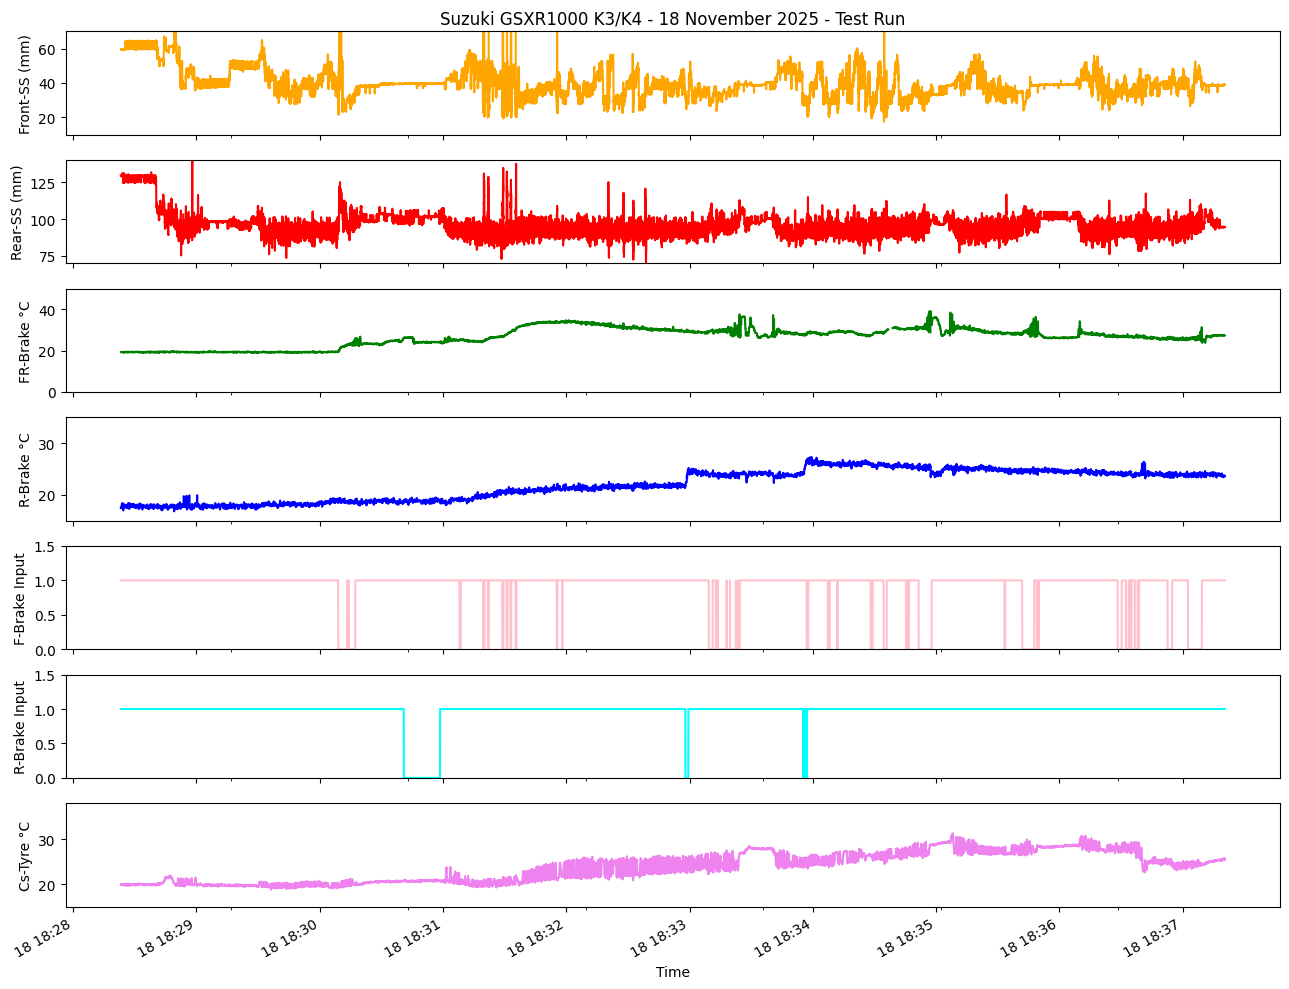

In [ ]:
fig, axs = plt.subplots(8,1, figsize=(13,10), sharex=True)

axs[0].set_title("Suzuki GSXR1000 K3/K4 - 18 November 2025 - Test Run")

df_plot["front_imu_sonar_mm"].plot(ax=axs[0], color="orange")
axs[0].set_ylim(10, 70)
axs[0].set_ylabel("Front-SS (mm)")


df_plot["rear_brake_gps_rear_ss_mm"].plot(ax=axs[1], color="red")
axs[1].set_ylim(70, 140)
axs[1].set_ylabel("Rear-SS (mm)")

df_plot["front_brakes_tps_S1"].plot(ax=axs[2], color="green")
axs[2].set_ylim(15, 50)
axs[2].set_ylabel("FR-Brake °C")

df_plot["rear_brake_gps_S1"].plot(ax=axs[3], color="blue")
axs[3].set_ylim(15, 40)
axs[3].set_ylabel("R-Brake °C")

df_plot["brakes_imu_in_d5"].plot(ax=axs[4], color="pink")
axs[4].set_ylim(0, 1.25)
axs[4].set_ylabel("F-Brake Input")

df_plot["brakes_imu_in_d6"].plot(ax=axs[5], color="cyan")
axs[5].set_ylim(0, 1.25)
axs[5].set_ylabel("R-Brake Input")

df_plot["front_tyre_S1"].plot(ax=axs[6], color="violet")
axs[6].set_ylim(15, 40)
axs[6].set_ylabel("Ls-Tyre °C")

df_plot["front_tyre_S2"].plot(ax=axs[7], color="violet")
axs[7].set_ylim(15, 40)
axs[7].set_ylabel("Cs-Tyre °C")

#df_plot["front_tyre_S3"].plot(ax=axs[8], color="violet")
#axs[8].set_ylim(0, 100)
#axs[8].set_ylabel("Rs-Tyre °C")

axs[7].set_xlabel("Time")

plt.tight_layout()
plt.show()